In [2]:
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #fmt = '.2f' if normalize else 'd'
    if 0:
        fmt = '.2f' 

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [3]:
ls models

hmdb51/
hmdb51_split_1_tsn_flow_reference_bn_inception.caffemodel
hmdb51_split_1_tsn_rgb_reference_bn_inception.caffemodel
hmdb51_split_2_tsn_flow_reference_bn_inception.caffemodel
hmdb51_split_2_tsn_rgb_reference_bn_inception.caffemodel
hmdb51_split_3_tsn_flow_reference_bn_inception.caffemodel
hmdb51_split_3_tsn_rgb_reference_bn_inception.caffemodel
ucf101/
ucf101_split_1_tsn_flow_reference_bn_inception.caffemodel
ucf101_split_1_tsn_rgb_reference_bn_inception.caffemodel
ucf101_split_2_tsn_flow_reference_bn_inception.caffemodel
ucf101_split_2_tsn_rgb_reference_bn_inception.caffemodel
ucf101_split_3_tsn_flow_reference_bn_inception.caffemodel
ucf101_split_3_tsn_rgb_reference_bn_inception.caffemodel


In [4]:
ls videos


brush_hair/    eat/         kiss/        shake_hands/     sword/
cartwheel/     fall_floor/  laugh/       shoot_ball/      sword_exercise/
catch/         fencing/     pick/        shoot_bow/       talk/
chew/          flic_flac/   pour/        shoot_gun/       throw/
clap/          golf/        pullup/      sit/             turn/
climb/         handstand/   punch/       situp/           walk/
climb_stairs/  hit/         push/        smile/           wave/
dive/          hug/         pushup/      smoke/
draw_sword/    jump/        ride_bike/   somersault/
dribble/       kick/        ride_horse/  stand/
drink/         kick_ball/   run/         swing_baseball/


In [5]:
ls videos/drink

20060723sfjffsomelikeitwarmed_drink_f_nm_np1_fr_med_5.avi
21_drink_u_nm_np1_fr_goo_9.avi
310ToYuma_drink_h_cm_np1_le_goo_3.avi
310ToYuma_drink_h_nm_np1_fr_goo_2.avi
310ToYuma_drink_u_nm_np1_le_goo_5.avi
50_FIRST_DATES_drink_u_nm_np1_fr_goo_29.avi
AMADEUS_drink_u_nm_np1_fr_goo_11.avi
A_Beautiful_Mind_1_drink_u_cm_np1_fr_goo_4.avi
A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi
AboutABoy_drink_u_nm_np1_fr_goo_8.avi
AllThePresidentMen_drink_f_nm_np1_ri_med_8.avi
AllThePresidentMen_drink_f_nm_np2_ri_med_2.avi
AllThePresidentMen_drink_h_nm_np1_fr_goo_5.avi
AllThePresidentMen_drink_u_nm_np1_fr_goo_4.avi
AmericanGangster_drink_h_nm_np1_fr_goo_17.avi
AmericanGangster_drink_h_nm_np1_fr_goo_27.avi
AmericanGangster_drink_h_nm_np1_fr_goo_53.avi
AmericanGangster_drink_h_nm_np1_fr_goo_68.avi
AmericanGangster_drink_h_nm_np1_fr_goo_69.avi
AmericanGangster_drink_h_nm_np1_fr_med_28.avi
AmericanGangster_drink_h_nm_np1_ri_bad_4.avi
AmericanGangster_drink_h_nm_np1_ri_med_3.avi
AmericanGangster_drink_u_cm_np

In [6]:
import sys, os 
print(os.getcwd())

/temporal-segment-networks


In [7]:
sys.path.append(os.path.abspath("/temporal-segment-networks/tools"))

In [ ]:
#<<<<uncomment to generate flows
#flowspath = os.getcwd() + '/data_flows'
#videospath = 'videos'

In [8]:
import subprocess
flowspath = os.getcwd() + '/data_flows'
videospath = 'videos'
if not os.path.exists(flowspath):
    os.makedirs(flowspath)

cmdfullpath = os.getcwd() + "/scripts/extract_optical_flow.sh"
print(cmdfullpath)
print(flowspath)

/temporal-segment-networks/scripts/extract_optical_flow.sh
/temporal-segment-networks/data_flows


In [11]:
############ this takes quite a while!!!!
if 0:
    subprocess.check_call([cmdfullpath, videospath, flowspath, '1' ]) 
# in scripts/ do chmod a+x * 

In [12]:
mypathpath = os.path.join(flowspath, 'Drawing_and_Resheathing_the_Japanese_Sword_draw_sword_u_nm_np1_le_med_0')
#mypathpath = flowspath+ '/American_History_X_push_u_nm_np1_ba_med_22'

In [13]:
os.listdir(mypathpath)

['flow_x_00064.jpg',
 'flow_x_00060.jpg',
 'flow_x_00053.jpg',
 'flow_x_00036.jpg',
 'flow_y_00050.jpg',
 'img_00052.jpg',
 'flow_x_00032.jpg',
 'flow_y_00066.jpg',
 'img_00034.jpg',
 'flow_y_00068.jpg',
 'flow_y_00045.jpg',
 'img_00058.jpg',
 'img_00013.jpg',
 'img_00006.jpg',
 'flow_y_00076.jpg',
 'flow_y_00029.jpg',
 'img_00066.jpg',
 'img_00048.jpg',
 'flow_x_00034.jpg',
 'flow_y_00024.jpg',
 'flow_x_00031.jpg',
 'flow_y_00054.jpg',
 'flow_x_00063.jpg',
 'img_00033.jpg',
 'img_00067.jpg',
 'img_00062.jpg',
 'img_00014.jpg',
 'flow_y_00030.jpg',
 'flow_x_00040.jpg',
 'flow_y_00056.jpg',
 'img_00012.jpg',
 'flow_x_00028.jpg',
 'flow_y_00013.jpg',
 'flow_x_00008.jpg',
 'flow_y_00074.jpg',
 'img_00053.jpg',
 'flow_y_00015.jpg',
 'flow_x_00006.jpg',
 'img_00017.jpg',
 'flow_x_00059.jpg',
 'flow_x_00020.jpg',
 'flow_x_00004.jpg',
 'img_00019.jpg',
 'img_00024.jpg',
 'flow_y_00058.jpg',
 'flow_x_00009.jpg',
 'flow_x_00035.jpg',
 'flow_x_00013.jpg',
 'flow_x_00070.jpg',
 'img_00059.jpg',
 

/temporal-segment-networks/data_flows/Drawing_and_Resheathing_the_Japanese_Sword_draw_sword_u_nm_np1_le_med_0/img_00052.jpg


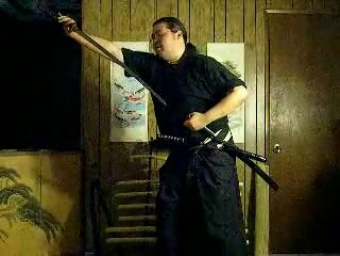

In [14]:
from IPython.display import Image
print(mypathpath+'/img_00052.jpg')
Image(mypathpath+'/img_00052.jpg')

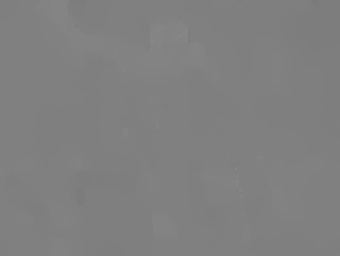

In [15]:
Image(mypathpath+'/flow_x_00052.jpg')

In [16]:
sys.argv = ['','hmdb51','1','rgb',flowspath,'models/hmdb51/tsn_bn_inception_rgb_deploy.prototxt',\
            'models/hmdb51_split_1_tsn_rgb_reference_bn_inception.caffemodel' ,  '--num_worker', '1', '--save_scores', 'myscores_fre.txt']
#sys.argv = ['','ucf101','1','rgb',flowspath,'models/ucf101/tsn_bn_inception_rgb_deploy.prototxt','models/ucf101_split_1_tsn_rgb_reference_bn_inception.caffemodel' ]



In [ ]:
#from eval_net import * ####uncomment to run everything all at once. it fails a lot, so dont try it...

In [17]:
import argparse
import os
import sys
import math
import cv2

import multiprocessing
from sklearn.metrics import confusion_matrix

sys.path.append('.')
from pyActionRecog import parse_directory
from pyActionRecog import parse_split_file

from pyActionRecog.utils.video_funcs import default_aggregation_func

parser = argparse.ArgumentParser()
parser.add_argument('dataset', type=str, choices=['ucf101', 'hmdb51'])
parser.add_argument('split', type=int, choices=[1, 2, 3],
                    help='on which split to test the network')
parser.add_argument('modality', type=str, choices=['rgb', 'flow'])
parser.add_argument('frame_path', type=str, help="root directory holding the frames")
parser.add_argument('net_proto', type=str)
parser.add_argument('net_weights', type=str)
parser.add_argument('--rgb_prefix', type=str, help="prefix of RGB frames", default='img_')
parser.add_argument('--flow_x_prefix', type=str, help="prefix of x direction flow images", default='flow_x_')
parser.add_argument('--flow_y_prefix', type=str, help="prefix of y direction flow images", default='flow_y_')
parser.add_argument('--num_frame_per_video', type=int, default=25,
                    help="prefix of y direction flow images")
parser.add_argument('--save_scores', type=str, default=None, help='the filename to save the scores in')
parser.add_argument('--num_worker', type=int, default=1)
parser.add_argument("--caffe_path", type=str, default='./lib/caffe-action/', help='path to the caffe toolbox')
parser.add_argument("--gpus", type=int, nargs='+', default=None, help='specify list of gpu to use')
args = parser.parse_args()

print args


Namespace(caffe_path='./lib/caffe-action/', dataset='hmdb51', flow_x_prefix='flow_x_', flow_y_prefix='flow_y_', frame_path='/temporal-segment-networks/data_flows', gpus=None, modality='rgb', net_proto='models/hmdb51/tsn_bn_inception_rgb_deploy.prototxt', net_weights='models/hmdb51_split_1_tsn_rgb_reference_bn_inception.caffemodel', num_frame_per_video=25, num_worker=1, rgb_prefix='img_', save_scores='myscores_fre.txt', split=1)


In [18]:
def build_net():
    global net
    my_id = multiprocessing.current_process()._identity[0] \
        if args.num_worker > 1 else 1
    if gpu_list is None:
        net = CaffeNet(args.net_proto, args.net_weights, my_id-1)
    else:
        net = CaffeNet(args.net_proto, args.net_weights, gpu_list[my_id - 1])

In [19]:
def eval_video(video):
    global net
    label = video[1]
    vid = video[0]

    video_frame_path = f_info[0][vid]
    if args.modality == 'rgb':
        cnt_indexer = 1
    elif args.modality == 'flow':
        cnt_indexer = 2
    else:
        raise ValueError(args.modality)
    frame_cnt = f_info[cnt_indexer][vid]

    stack_depth = 0
    if args.modality == 'rgb':
        stack_depth = 1
    elif args.modality == 'flow':
        stack_depth = 5

    step = (frame_cnt - stack_depth) / (args.num_frame_per_video-1)
    if step > 0:
        frame_ticks = range(1, min((2 + step * (args.num_frame_per_video-1)), frame_cnt+1), step)
    else:
        frame_ticks = [1] * args.num_frame_per_video

    assert(len(frame_ticks) == args.num_frame_per_video)

    frame_scores = []
    for tick in frame_ticks:
        if args.modality == 'rgb':
            name = '{}{:05d}.jpg'.format(args.rgb_prefix, tick)
            frame = cv2.imread(os.path.join(video_frame_path, name), cv2.IMREAD_COLOR)
            try:
                scores = net.predict_single_frame([frame,], score_name, frame_size=(340, 256))
            except:
                print(os.path.join(video_frame_path, name))
                Image(os.path.join(video_frame_path, name))
                    
            frame_scores.append(scores)
        if args.modality == 'flow':
            frame_idx = [min(frame_cnt, tick+offset) for offset in xrange(stack_depth)]
            flow_stack = []
            for idx in frame_idx:
                x_name = '{}{:05d}.jpg'.format(args.flow_x_prefix, idx)
                y_name = '{}{:05d}.jpg'.format(args.flow_y_prefix, idx)
                flow_stack.append(cv2.imread(os.path.join(video_frame_path, x_name), cv2.IMREAD_GRAYSCALE))
                flow_stack.append(cv2.imread(os.path.join(video_frame_path, y_name), cv2.IMREAD_GRAYSCALE))
            scores = net.predict_single_flow_stack(flow_stack, score_name, frame_size=(340, 256))
            frame_scores.append(scores)

    print 'video {} done'.format(vid)
    sys.stdin.flush()
    return np.array(frame_scores), label

In [20]:
sys.path.append(os.path.join(args.caffe_path, 'python'))
from pyActionRecog.action_caffe import CaffeNet

# build neccessary information
print args.dataset
split_tp = parse_split_file(args.dataset)
f_info = parse_directory(args.frame_path,
                         args.rgb_prefix, args.flow_x_prefix, args.flow_y_prefix)

gpu_list = args.gpus


eval_video_list = split_tp[args.split - 1][1]

score_name = 'fc-action'




hmdb51
parse frames under folder /temporal-segment-networks/data_flows
0 videos parsed
200 videos parsed
400 videos parsed
600 videos parsed
800 videos parsed
1000 videos parsed
1200 videos parsed
1400 videos parsed
1600 videos parsed
1800 videos parsed
2000 videos parsed
2200 videos parsed
2400 videos parsed
2600 videos parsed
2800 videos parsed
3000 videos parsed
3200 videos parsed
3400 videos parsed
3600 videos parsed
3800 videos parsed
4000 videos parsed
4200 videos parsed
4400 videos parsed
4600 videos parsed
4800 videos parsed
5000 videos parsed
5200 videos parsed
5400 videos parsed
5600 videos parsed
5800 videos parsed
6000 videos parsed
6200 videos parsed
6400 videos parsed
6600 videos parsed
frame folder analysis done


In [22]:
len(eval_video_list)

1530

In [21]:
if 0:
    eval_video_list =  [('foo',1)]
    print(eval_video_list[0
                     ])
    print(f_info)

In [23]:
if args.num_worker > 1:
    pool = multiprocessing.Pool(args.num_worker, initializer=build_net)
    video_scores_rgb = pool.map(eval_video, log_progress(eval_video_list))
else:
    build_net()
    video_scores_rgb = map(eval_video, log_progress(eval_video_list))


video American_History_X_push_u_nm_np1_ba_med_22 done
video Ashleigh_Staley_Truck_Push_push_f_cm_np1_ba_med_4 done
video Ashleigh_Staley_Truck_Push_push_f_cm_np1_ri_med_0 done
video Ashleigh_Staley_Truck_Push_push_f_cm_np1_ri_med_1 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_ba_bad_1 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_ba_bad_4 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_ba_bad_7 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_fr_bad_3 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_fr_bad_5 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_le_bad_6 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_ri_bad_2 done
video Box_Pull_Push_push_f_cm_np1_ba_bad_2 done
video Box_Pull_Push_push_f_cm_np1_ba_bad_3 done
video Davos_-_Anschieben_von_Michis_Auto_push_f_cm_np1_fr_bad_0 done
video Dodge_Truck_Push_8

video Handstandk_nig_handstand_f_cm_np1_ri_med_3 done
video How_to_do_a_Handstand_handstand_f_nm_np1_ri_bad_0 done
video How_to_do_a_Handstand_handstand_f_nm_np1_ri_bad_1 done
video Learn_How_to_do_a_Handstand_handstand_f_nm_np1_ri_med_0 done
video Learn_How_to_do_a_Handstand_handstand_f_nm_np1_ri_med_1 done
video Parada_de_mao___wall_spin_handstand_f_cm_np2_le_med_0 done
video Projekt_SPOHO_2008_-_27_02_08_-_Training-_Bodenk_r_4_handstand_f_cm_np1_le_med_1 done
video Scorpion_handstand_handstand_f_nm_np1_ri_med_0 done
video Turn_pr_fung_glaser_schule_handstand_f_cm_np1_le_med_2 done
video Turnk_r_Pippi_Michel_handstand_f_cm_np2_le_med_5 done
video Turnk_r_handstand_f_cm_np4_ba_med_2 done
video Turnk_r_handstand_f_cm_np4_ba_med_3 done
video handstand_tutorial___how_to_do_a_handstand_basic_breakdance_handstand_f_nm_np1_ri_med_1 done
video handstand_tutorial___how_to_do_a_handstand_basic_breakdance_handstand_f_nm_np1_ri_med_2 done
video handstands_1_handstand_f_cm_np1_fr_med_0 done
video

video The_Matrix_5_turn_h_nm_np1_ba_goo_7 done
video ThreeStories_turn_u_cm_np1_fr_med_0 done
video Two_Towers_5_turn_u_nm_np1_ba_med_4 done
video Veoh_Alpha_Dog_2_turn_u_nm_np1_fr_med_24 done
video Veoh_Alpha_Dog_2_turn_u_nm_np1_le_med_1 done
video Veoh_Alpha_Dog_2_turn_u_nm_np1_ri_med_2 done
video Veoh_Alpha_Dog_2_turn_u_nm_np2_ri_med_18 done
video likebeckam_turn_f_cm_np1_ba_med_41 done
video likebeckam_turn_f_cm_np1_ba_med_44 done
video likebeckam_turn_f_cm_np1_le_med_16 done
video likebeckam_turn_f_cm_np1_ri_med_43 done
video likebeckam_turn_f_nm_np1_fr_med_38 done
video 5GreatHollywoodKisses_kiss_h_cm_np2_ri_goo_1 done
video 5GreatHollywoodKisses_kiss_h_nm_np2_ri_goo_0 done
video 5GreatHollywoodKisses_kiss_u_nm_np2_ri_goo_2 done
video Moviekissmontage_kiss_h_cm_np2_fr_med_4 done
video Moviekissmontage_kiss_h_cm_np2_fr_med_8 done
video Moviekissmontage_kiss_h_cm_np2_le_goo_0 done
video Moviekissmontage_kiss_h_cm_np2_ri_goo_6 done
video Moviekissmontage_kiss_u_cm_np2_fr_goo_5 done


video Torwarttraining_2_(_sterreich)_catch_f_cm_np1_le_med_4 done
video Torwarttraining_2_(_sterreich)_catch_f_cm_np1_le_med_5 done
video Me_smiling_smile_h_nm_np1_fr_goo_0 done
video Pirates_3_smile_h_nm_np1_ri_goo_1 done
video Prelinger_ActYourA1949_smile_u_nm_np1_fr_med_19 done
video Re-_Show_your_Smile!_1_smile_h_nm_np1_fr_goo_0 done
video Re-_Show_your_Smile!_8_smile_h_nm_np1_fr_goo_0 done
video SE7EN_SMILES_x3_smile_h_cm_np1_fr_goo_5 done
video SE7EN_SMILES_x3_smile_h_cm_np1_fr_goo_9 done
video SE7EN_SMILES_x3_smile_h_cm_np1_fr_med_0 done
video SE7EN_SMILES_x3_smile_h_cm_np1_fr_med_10 done
video SE7EN_SMILES_x3_smile_h_cm_np1_fr_med_3 done
video SE7EN_SMILES_x3_smile_h_nm_np1_fr_bad_7 done
video SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_1 done
video SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_2 done
video SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_4 done
video SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_6 done
video SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_8 done
video SMILES_FROM_OFF_THE_ROAD_2_-TREASU

video BungyjumpingAJHackettNewZealand_dive_f_cm_np1_ba_bad_3 done
video BungyjumpingAJHackettNewZealand_dive_f_cm_np1_fr_bad_1 done
video Butcho_dive_f_cm_np1_fr_bad_0 done
video Butcho_dive_f_cm_np1_fr_bad_1 done
video HP_PRISONER_OF_AZKABAN_dive_f_cm_np1_fr_bad_28 done
video Jeff_Bungee_Jumping_dive_f_cm_np1_fr_bad_0 done
video Jeff_Bungee_Jumping_dive_f_cm_np1_fr_bad_1 done
video Jeff_Bungee_Jumping_dive_f_cm_np1_ri_bad_2 done
video K_pfer_vom_Tim_dive_f_cm_np1_ri_bad_0 done
video K_pfer_von_10-Meter-Brett_dive_f_cm_np1_ri_bad_0 done
video Oberstrick_-_K_pfer_-_3m_dive_f_cm_np1_le_bad_0 done
video OldSchool_dive_f_cm_np2_ri_bad_15 done
video Parkour_Dive_dive_f_cm_np1_le_bad_1 done
video RATRACE_dive_f_cm_np1_le_bad_25 done
video Return_of_the_King_1_dive_f_cm_np1_fr_bad_10 done
video base_jumping_compilation_3_FMJ_dive_f_cm_np1_ba_bad_0 done
video base_jumping_compilation_3_FMJ_dive_f_cm_np1_le_bad_1 done
video base_jumping_compilation_3_FMJ_dive_f_cm_np1_ri_bad_2 done
video bungee

video Fellowship_2_run_f_cm_np2_fr_med_5 done
video Fellowship_6_run_f_cm_np1_fr_med_8 done
video GOAL_2_living_the_dream_movie_part_2_run_f_cm_np4_fr_med_1 done
video IamLegend_run_f_nm_np1_le_med_3 done
video Juno_run_f_cm_np1_ba_med_5 done
video Man_Who_Cheated_Himself_512kb_run_f_cm_np1_fr_bad_4 done
video Man_Who_Cheated_Himself_512kb_run_f_cm_np1_le_bad_5 done
video The_Matrix_1_run_f_cm_np1_fr_bad_0 done
video The_Matrix_3_run_f_cm_np1_ba_med_8 done
video The_Matrix_3_run_f_cm_np1_ri_med_7 done
video likebeckam_run_f_cm_np1_ba_med_22 done
video likebeckam_run_f_cm_np1_fr_med_5 done
video likebeckam_run_f_cm_np1_ri_med_0 done
video likebeckam_run_f_nm_np1_fr_bad_12 done
video veoh_harold_and_kumar_run_f_nm_np2_fr_bad_10 done
video veoh_harold_and_kumar_run_f_nm_np2_fr_med_6 done
video Amazing_Wall_Climber_(Must_be_Seen_to_Be_Believed!)_climb_f_cm_np1_ba_bad_1 done
video Amazing_Wall_Climber_(Must_be_Seen_to_Be_Believed!)_climb_f_cm_np1_ba_bad_2 done
video Amazing_Wall_Climber_(Mu

video AdvancedBoxingTechniquesandExercises_punch_u_nm_np1_ri_med_13 done
video AdvancedBoxingTechniquesandExercises_punch_u_nm_np1_ri_med_18 done
video AdvancedBoxingTechniquesandExercises_punch_u_nm_np1_ri_med_21 done
video AdvancedBoxingTechniquesandExercises_punch_u_nm_np1_ri_med_6 done
video AdvancedBoxingTechniquesandExercises_punch_u_nm_np1_ri_med_8 done
video AdvancedBoxingTechniquesandExercises_punch_u_nm_np1_ri_med_9 done
video BeginnerKyokushinKarateTechniques_punch_f_nm_np2_fr_med_1 done
video BoxingTipsHowtoBuildPunchingPower_punch_u_cm_np1_fr_goo_0 done
video BoxingTipsHowtoBuildPunchingPower_punch_u_cm_np1_fr_goo_1 done
video BoxingTipsHowtoBuildPunchingPower_punch_u_cm_np1_fr_med_3 done
video BoxingTipsHowtoBuildPunchingPower_punch_u_cm_np1_fr_med_4 done
video Glory_punch_f_nm_np1_fr_med_36 done
video Glory_punch_u_cm_np1_ba_med_50 done
video Glory_punch_u_cm_np1_fr_bad_37 done
video HARD_FACE_SLAP_COMPILATION_-_THE_FUNNIEST_FACE_SLAPS_EVER!!_-_Old_school_Vids_punch_f_cm

video RomeEpisode1_sit_u_cm_np1_fr_goo_1 done
video SweeneyTodd_sit_f_cm_np1_fr_bad_16 done
video SweeneyTodd_sit_f_nm_np1_fr_bad_34 done
video SweeneyTodd_sit_u_cm_np1_fr_med_14 done
video SweeneyTodd_sit_u_cm_np1_fr_med_21 done
video SweeneyTodd_sit_u_cm_np1_le_med_19 done
video SweeneyTodd_sit_u_nm_np1_le_med_20 done
video TheBoondockSaints_sit_f_cm_np1_ri_med_42 done
video TheBoondockSaints_sit_f_nm_np1_fr_med_71 done
video TheBoondockSaints_sit_u_cm_np1_fr_med_29 done
video TheBoondockSaints_sit_u_cm_np1_fr_med_34 done
video TheBoondockSaints_sit_u_cm_np1_le_med_15 done
video TheBoondockSaints_sit_u_nm_np10_ba_med_0 done
video TheRoyalTenenbaums_sit_u_nm_np1_fr_med_2 done
video TheRoyalTenenbaums_sit_u_nm_np1_fr_med_4 done
video American_History_X_talk_h_nm_np1_fr_goo_20 done
video American_History_X_talk_u_nm_np1_fr_goo_21 done
video Fellowship_3_talk_h_nm_np1_fr_goo_1 done
video Fellowship_3_talk_u_nm_np1_fr_med_5 done
video Hamlet_(1996)_Fencing_Scenes_talk_u_cm_np1_fr_med_0 do

video Piano_stairs__-_TheFunTheory_com_-_Rolighetsteorin_se_climb_stairs_f_nm_np3_ba_med_7 done
video Piano_stairs__-_TheFunTheory_com_-_Rolighetsteorin_se_climb_stairs_l_cm_np1_ba_med_8 done
video TheBoondockSaints_climb_stairs_f_cm_np3_ba_med_125 done
video TheBoondockSaints_climb_stairs_u_cm_np2_ba_med_30 done
video szenephoto_-_stevemachine_beim_treppensteigen_-_feuer_bung_climb_stairs_f_cm_np1_ba_bad_0 done
video treppensteigen_1_climb_stairs_f_cm_np2_fr_med_0 done
video treppensteigen_1_climb_stairs_f_cm_np2_fr_med_1 done
video treppensteigen_1_climb_stairs_f_cm_np2_fr_med_2 done
video Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_ba_med_3 done
video Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_fr_goo_1 done
video Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_fr_goo_2 done
video Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_fr_med_0 done
video Brushing_Her_Hair__[_NEW_AUDIO_]_UPDATED!!!!_brush_hair_h_cm_np1_fr_goo_0 done
video Brushing_Her_Hai

video Robin_and_the_magical_tea_pour_pour_u_cm_np1_fr_goo_0 done
video Tea_in_Wudang_pour_u_nm_np1_fr_med_0 done
video Tea_in_Wudang_pour_u_nm_np1_fr_med_1 done
video Tea_in_Wudang_pour_u_nm_np1_fr_med_2 done
video The_Pomegranate_Martini_pour_u_cm_np1_fr_med_1 done
video The_Pomegranate_Martini_pour_u_nm_np1_fr_med_0 done
video 20060723sfjffjewgotmail_stand_u_cm_np1_ri_med_0 done
video AllThePresidentMen_stand_u_nm_np1_le_med_1 done
video AmericanGangster_stand_f_nm_np1_le_med_33 done
video AmericanGangster_stand_u_cm_np1_fr_bad_0 done
video AmericanGangster_stand_u_cm_np1_fr_bad_19 done
video AmericanGangster_stand_u_nm_np1_fr_med_55 done
video BIG_FISH_stand_u_nm_np1_fr_med_27 done
video BLACK_HAWK_DOWN_stand_f_nm_np1_ba_med_14 done
video BLACK_HAWK_DOWN_stand_u_cm_np1_fr_med_35 done
video BLACK_HAWK_DOWN_stand_u_nm_np1_le_med_11 done
video CastAway1_stand_f_nm_np1_le_med_24 done
video ChildrenOfMen_stand_u_nm_np1_ba_med_1 done
video Crash_stand_f_cm_np1_le_med_15 done
video Crash_s

video 103_years_old_japanese_woman__Nao_is_clapping_with_piano_music_by_beethoven_clap_u_nm_np1_fr_med_0 done
video Aishwarya_Rai_Burns_David_Letterman_in_his_own_show_clap_u_cm_np1_fr_bad_1 done
video Alex_applauding_himself_clap_u_cm_np1_fr_med_1 done
video Alex_applauding_himself_clap_u_nm_np1_fr_med_0 done
video Finding_Forrester_3_clap_u_nm_np1_ri_med_0 done
video LetThePeopleClap_clap_u_cm_np1_fr_med_1 done
video LetThePeopleClap_clap_u_cm_np1_fr_med_2 done
video Martin_klatscht_in_die_h_nde_und_FURZT_clap_u_cm_np1_fr_med_0 done
video Return_of_the_King_12_clap_u_nm_np1_fr_goo_4 done
video Standing_clap_f_cm_np1_fr_med_0 done
video Standing_clap_f_cm_np1_fr_med_1 done
video The_Slow_Clap_clap_u_cm_np1_fr_med_3 done
video The_Slow_Clap_clap_u_cm_np1_fr_med_4 done
video The_Slow_Clap_clap_u_cm_np2_fr_med_17 done
video The_Slow_Clap_clap_u_nm_np1_fr_bad_20 done
video The_Slow_Clap_clap_u_nm_np1_fr_bad_25 done
video The_Slow_Clap_clap_u_nm_np1_fr_bad_27 done
video The_Slow_Clap_clap_

video Sixthsense_walk_u_nm_np1_fr_med_4 done
video Veoh_Alpha_Dog_1_walk_f_nm_np1_ri_med_24 done
video Veoh_Alpha_Dog_1_walk_u_cm_np1_fr_med_13 done
video Veoh_Alpha_Dog_2_walk_f_cm_np2_ri_med_10 done
video Veoh_Alpha_Dog_2_walk_f_nm_np4_fr_med_17 done
video Veoh_Alpha_Dog_2_walk_u_nm_np1_le_med_29 done
video prideandprejudice1_walk_f_nm_np1_fr_med_4 done
video prideandprejudice1_walk_u_nm_np1_fr_med_8 done
video 50_FIRST_DATES_fall_floor_f_cm_np1_fr_med_14 done
video BLACK_HAWK_DOWN_fall_floor_f_cm_np1_fr_bad_34 done
video Fellowship_3_fall_floor_f_nm_np1_fr_med_3 done
video Glory_fall_floor_f_cm_np1_fr_med_39 done
video LONGESTYARD_fall_floor_f_cm_np1_ba_med_13 done
video LONGESTYARD_fall_floor_f_cm_np1_fr_med_19 done
video LONGESTYARD_fall_floor_f_cm_np1_fr_med_25 done
video LONGESTYARD_fall_floor_f_cm_np1_le_bad_2 done
video LONGESTYARD_fall_floor_f_cm_np1_le_med_17 done
video LONGESTYARD_fall_floor_f_cm_np1_le_med_31 done
video RATRACE_fall_floor_f_cm_np1_fr_med_2 done
video RATRA

In [25]:
video_pred = [np.argmax(default_aggregation_func(x[0])) for x in video_scores_rgb]
video_labels = [x[1] for x in video_scores_rgb]

cf_rgb = confusion_matrix(video_labels, video_pred).astype(float)

cls_cnt = cf_rgb.sum(axis=1)
cls_hit = np.diag(cf_rgb)

cls_acc = cls_hit/cls_cnt

print cls_acc

print 'Accuracy {:.02f}%'.format(np.mean(cls_acc)*100)

if args.save_scores is not None:
    np.savez(args.save_scores, scores=video_scores_rgb, labels=video_labels)

[ 0.6   0.2   0.67  0.5   0.3   0.63  0.6   0.63  0.3   0.77  0.7   0.73
  0.3   0.5   0.5   0.9   0.6   0.33  0.77  0.37  0.57  0.33  0.87  0.6
  0.23  0.77  1.    0.4   0.7   0.93  0.93  0.83  0.43  0.73  0.7   0.9
  0.67  0.23  0.97  0.53  0.5   0.57  0.17  0.1   0.13  0.43  0.57  0.27
  0.43  0.33  0.1 ]
Accuracy 54.58%


Confusion matrix, without normalization
[[ 18.   0.   0. ...,   0.   0.   1.]
 [  0.   6.   0. ...,   0.   0.   0.]
 [  0.   0.  20. ...,   1.   0.   0.]
 ..., 
 [  0.   0.   0. ...,  13.   5.   0.]
 [  0.   0.   0. ...,   2.  10.   0.]
 [  1.   0.   4. ...,   2.   2.   3.]]


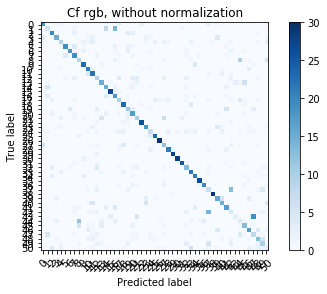

In [26]:
plt.figure()
plot_confusion_matrix(cf_rgb, classes=range(0,51),
                      title='Cf rgb, without normalization') #classes=class_names,

In [ ]:
print(video_labels)

In [27]:
def eval_video_flow(video,net):
    label = video[1]
    vid = video[0]

    video_frame_path = f_info[0][vid]
    cnt_indexer = 2
    frame_cnt = f_info[cnt_indexer][vid]
    stack_depth = 5

    step = (frame_cnt - stack_depth) / (args.num_frame_per_video-1)
    if step > 0:
        frame_ticks = range(1, min((2 + step * (args.num_frame_per_video-1)), frame_cnt+1), step)
    else:
        frame_ticks = [1] * args.num_frame_per_video

    assert(len(frame_ticks) == args.num_frame_per_video)

    frame_scores = []
    for tick in frame_ticks:
        frame_idx = [min(frame_cnt, tick+offset) for offset in xrange(stack_depth)]
        flow_stack = []
        for idx in frame_idx:
            x_name = '{}{:05d}.jpg'.format(args.flow_x_prefix, idx)
            y_name = '{}{:05d}.jpg'.format(args.flow_y_prefix, idx)
            flow_stack.append(cv2.imread(os.path.join(video_frame_path, x_name), cv2.IMREAD_GRAYSCALE))
            flow_stack.append(cv2.imread(os.path.join(video_frame_path, y_name), cv2.IMREAD_GRAYSCALE))
        scores = net.predict_single_flow_stack(flow_stack, score_name, frame_size=(340, 256))
        frame_scores.append(scores)

    print 'video {} done'.format(vid)
    sys.stdin.flush()
    return np.array(frame_scores), label

In [28]:
def build_net_flow(net_proto, net_weights):
    my_id = multiprocessing.current_process()._identity[0] \
        if args.num_worker > 1 else 1
    if gpu_list is None:
        net = CaffeNet(net_proto, net_weights, my_id-1)
    else:
        net = CaffeNet(net_proto, net_weights, gpu_list[my_id - 1])
    return net

In [29]:
netflow = build_net_flow('models/hmdb51/tsn_bn_inception_flow_deploy.prototxt', 'models/hmdb51_split_1_tsn_flow_reference_bn_inception.caffemodel')
evalvidflow = lambda x: eval_video_flow(x, netflow)
if args.num_worker > 1:        
    pool = multiprocessing.Pool(args.num_worker)
    video_scores_flow = pool.map(evalvidflow, log_progress(eval_video_list))
else:
    video_scores_flow = map(evalvidflow, log_progress(eval_video_list))

video American_History_X_push_u_nm_np1_ba_med_22 done
video Ashleigh_Staley_Truck_Push_push_f_cm_np1_ba_med_4 done
video Ashleigh_Staley_Truck_Push_push_f_cm_np1_ri_med_0 done
video Ashleigh_Staley_Truck_Push_push_f_cm_np1_ri_med_1 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_ba_bad_1 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_ba_bad_4 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_ba_bad_7 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_fr_bad_3 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_fr_bad_5 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_le_bad_6 done
video Big_Bebe_walking_and_pushing_her_lion_in_a_box!_push_f_cm_np1_ri_bad_2 done
video Box_Pull_Push_push_f_cm_np1_ba_bad_2 done
video Box_Pull_Push_push_f_cm_np1_ba_bad_3 done
video Davos_-_Anschieben_von_Michis_Auto_push_f_cm_np1_fr_bad_0 done
video Dodge_Truck_Push_8

video Handstandk_nig_handstand_f_cm_np1_ri_med_3 done
video How_to_do_a_Handstand_handstand_f_nm_np1_ri_bad_0 done
video How_to_do_a_Handstand_handstand_f_nm_np1_ri_bad_1 done
video Learn_How_to_do_a_Handstand_handstand_f_nm_np1_ri_med_0 done
video Learn_How_to_do_a_Handstand_handstand_f_nm_np1_ri_med_1 done
video Parada_de_mao___wall_spin_handstand_f_cm_np2_le_med_0 done
video Projekt_SPOHO_2008_-_27_02_08_-_Training-_Bodenk_r_4_handstand_f_cm_np1_le_med_1 done
video Scorpion_handstand_handstand_f_nm_np1_ri_med_0 done
video Turn_pr_fung_glaser_schule_handstand_f_cm_np1_le_med_2 done
video Turnk_r_Pippi_Michel_handstand_f_cm_np2_le_med_5 done
video Turnk_r_handstand_f_cm_np4_ba_med_2 done
video Turnk_r_handstand_f_cm_np4_ba_med_3 done
video handstand_tutorial___how_to_do_a_handstand_basic_breakdance_handstand_f_nm_np1_ri_med_1 done
video handstand_tutorial___how_to_do_a_handstand_basic_breakdance_handstand_f_nm_np1_ri_med_2 done
video handstands_1_handstand_f_cm_np1_fr_med_0 done
video

video The_Matrix_5_turn_h_nm_np1_ba_goo_7 done
video ThreeStories_turn_u_cm_np1_fr_med_0 done
video Two_Towers_5_turn_u_nm_np1_ba_med_4 done
video Veoh_Alpha_Dog_2_turn_u_nm_np1_fr_med_24 done
video Veoh_Alpha_Dog_2_turn_u_nm_np1_le_med_1 done
video Veoh_Alpha_Dog_2_turn_u_nm_np1_ri_med_2 done
video Veoh_Alpha_Dog_2_turn_u_nm_np2_ri_med_18 done
video likebeckam_turn_f_cm_np1_ba_med_41 done
video likebeckam_turn_f_cm_np1_ba_med_44 done
video likebeckam_turn_f_cm_np1_le_med_16 done
video likebeckam_turn_f_cm_np1_ri_med_43 done
video likebeckam_turn_f_nm_np1_fr_med_38 done
video 5GreatHollywoodKisses_kiss_h_cm_np2_ri_goo_1 done
video 5GreatHollywoodKisses_kiss_h_nm_np2_ri_goo_0 done
video 5GreatHollywoodKisses_kiss_u_nm_np2_ri_goo_2 done
video Moviekissmontage_kiss_h_cm_np2_fr_med_4 done
video Moviekissmontage_kiss_h_cm_np2_fr_med_8 done
video Moviekissmontage_kiss_h_cm_np2_le_goo_0 done
video Moviekissmontage_kiss_h_cm_np2_ri_goo_6 done
video Moviekissmontage_kiss_u_cm_np2_fr_goo_5 done


video Torwarttraining_2_(_sterreich)_catch_f_cm_np1_le_med_4 done
video Torwarttraining_2_(_sterreich)_catch_f_cm_np1_le_med_5 done
video Me_smiling_smile_h_nm_np1_fr_goo_0 done
video Pirates_3_smile_h_nm_np1_ri_goo_1 done
video Prelinger_ActYourA1949_smile_u_nm_np1_fr_med_19 done
video Re-_Show_your_Smile!_1_smile_h_nm_np1_fr_goo_0 done
video Re-_Show_your_Smile!_8_smile_h_nm_np1_fr_goo_0 done
video SE7EN_SMILES_x3_smile_h_cm_np1_fr_goo_5 done
video SE7EN_SMILES_x3_smile_h_cm_np1_fr_goo_9 done
video SE7EN_SMILES_x3_smile_h_cm_np1_fr_med_0 done
video SE7EN_SMILES_x3_smile_h_cm_np1_fr_med_10 done
video SE7EN_SMILES_x3_smile_h_cm_np1_fr_med_3 done
video SE7EN_SMILES_x3_smile_h_nm_np1_fr_bad_7 done
video SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_1 done
video SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_2 done
video SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_4 done
video SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_6 done
video SE7EN_SMILES_x3_smile_h_nm_np1_fr_med_8 done
video SMILES_FROM_OFF_THE_ROAD_2_-TREASU

video BungyjumpingAJHackettNewZealand_dive_f_cm_np1_ba_bad_3 done
video BungyjumpingAJHackettNewZealand_dive_f_cm_np1_fr_bad_1 done
video Butcho_dive_f_cm_np1_fr_bad_0 done
video Butcho_dive_f_cm_np1_fr_bad_1 done
video HP_PRISONER_OF_AZKABAN_dive_f_cm_np1_fr_bad_28 done
video Jeff_Bungee_Jumping_dive_f_cm_np1_fr_bad_0 done
video Jeff_Bungee_Jumping_dive_f_cm_np1_fr_bad_1 done
video Jeff_Bungee_Jumping_dive_f_cm_np1_ri_bad_2 done
video K_pfer_vom_Tim_dive_f_cm_np1_ri_bad_0 done
video K_pfer_von_10-Meter-Brett_dive_f_cm_np1_ri_bad_0 done
video Oberstrick_-_K_pfer_-_3m_dive_f_cm_np1_le_bad_0 done
video OldSchool_dive_f_cm_np2_ri_bad_15 done
video Parkour_Dive_dive_f_cm_np1_le_bad_1 done
video RATRACE_dive_f_cm_np1_le_bad_25 done
video Return_of_the_King_1_dive_f_cm_np1_fr_bad_10 done
video base_jumping_compilation_3_FMJ_dive_f_cm_np1_ba_bad_0 done
video base_jumping_compilation_3_FMJ_dive_f_cm_np1_le_bad_1 done
video base_jumping_compilation_3_FMJ_dive_f_cm_np1_ri_bad_2 done
video bungee

video Fellowship_2_run_f_cm_np2_fr_med_5 done
video Fellowship_6_run_f_cm_np1_fr_med_8 done
video GOAL_2_living_the_dream_movie_part_2_run_f_cm_np4_fr_med_1 done
video IamLegend_run_f_nm_np1_le_med_3 done
video Juno_run_f_cm_np1_ba_med_5 done
video Man_Who_Cheated_Himself_512kb_run_f_cm_np1_fr_bad_4 done
video Man_Who_Cheated_Himself_512kb_run_f_cm_np1_le_bad_5 done
video The_Matrix_1_run_f_cm_np1_fr_bad_0 done
video The_Matrix_3_run_f_cm_np1_ba_med_8 done
video The_Matrix_3_run_f_cm_np1_ri_med_7 done
video likebeckam_run_f_cm_np1_ba_med_22 done
video likebeckam_run_f_cm_np1_fr_med_5 done
video likebeckam_run_f_cm_np1_ri_med_0 done
video likebeckam_run_f_nm_np1_fr_bad_12 done
video veoh_harold_and_kumar_run_f_nm_np2_fr_bad_10 done
video veoh_harold_and_kumar_run_f_nm_np2_fr_med_6 done
video Amazing_Wall_Climber_(Must_be_Seen_to_Be_Believed!)_climb_f_cm_np1_ba_bad_1 done
video Amazing_Wall_Climber_(Must_be_Seen_to_Be_Believed!)_climb_f_cm_np1_ba_bad_2 done
video Amazing_Wall_Climber_(Mu

video AdvancedBoxingTechniquesandExercises_punch_u_nm_np1_ri_med_13 done
video AdvancedBoxingTechniquesandExercises_punch_u_nm_np1_ri_med_18 done
video AdvancedBoxingTechniquesandExercises_punch_u_nm_np1_ri_med_21 done
video AdvancedBoxingTechniquesandExercises_punch_u_nm_np1_ri_med_6 done
video AdvancedBoxingTechniquesandExercises_punch_u_nm_np1_ri_med_8 done
video AdvancedBoxingTechniquesandExercises_punch_u_nm_np1_ri_med_9 done
video BeginnerKyokushinKarateTechniques_punch_f_nm_np2_fr_med_1 done
video BoxingTipsHowtoBuildPunchingPower_punch_u_cm_np1_fr_goo_0 done
video BoxingTipsHowtoBuildPunchingPower_punch_u_cm_np1_fr_goo_1 done
video BoxingTipsHowtoBuildPunchingPower_punch_u_cm_np1_fr_med_3 done
video BoxingTipsHowtoBuildPunchingPower_punch_u_cm_np1_fr_med_4 done
video Glory_punch_f_nm_np1_fr_med_36 done
video Glory_punch_u_cm_np1_ba_med_50 done
video Glory_punch_u_cm_np1_fr_bad_37 done
video HARD_FACE_SLAP_COMPILATION_-_THE_FUNNIEST_FACE_SLAPS_EVER!!_-_Old_school_Vids_punch_f_cm

video RomeEpisode1_sit_u_cm_np1_fr_goo_1 done
video SweeneyTodd_sit_f_cm_np1_fr_bad_16 done
video SweeneyTodd_sit_f_nm_np1_fr_bad_34 done
video SweeneyTodd_sit_u_cm_np1_fr_med_14 done
video SweeneyTodd_sit_u_cm_np1_fr_med_21 done
video SweeneyTodd_sit_u_cm_np1_le_med_19 done
video SweeneyTodd_sit_u_nm_np1_le_med_20 done
video TheBoondockSaints_sit_f_cm_np1_ri_med_42 done
video TheBoondockSaints_sit_f_nm_np1_fr_med_71 done
video TheBoondockSaints_sit_u_cm_np1_fr_med_29 done
video TheBoondockSaints_sit_u_cm_np1_fr_med_34 done
video TheBoondockSaints_sit_u_cm_np1_le_med_15 done
video TheBoondockSaints_sit_u_nm_np10_ba_med_0 done
video TheRoyalTenenbaums_sit_u_nm_np1_fr_med_2 done
video TheRoyalTenenbaums_sit_u_nm_np1_fr_med_4 done
video American_History_X_talk_h_nm_np1_fr_goo_20 done
video American_History_X_talk_u_nm_np1_fr_goo_21 done
video Fellowship_3_talk_h_nm_np1_fr_goo_1 done
video Fellowship_3_talk_u_nm_np1_fr_med_5 done
video Hamlet_(1996)_Fencing_Scenes_talk_u_cm_np1_fr_med_0 do

video Piano_stairs__-_TheFunTheory_com_-_Rolighetsteorin_se_climb_stairs_f_nm_np3_ba_med_7 done
video Piano_stairs__-_TheFunTheory_com_-_Rolighetsteorin_se_climb_stairs_l_cm_np1_ba_med_8 done
video TheBoondockSaints_climb_stairs_f_cm_np3_ba_med_125 done
video TheBoondockSaints_climb_stairs_u_cm_np2_ba_med_30 done
video szenephoto_-_stevemachine_beim_treppensteigen_-_feuer_bung_climb_stairs_f_cm_np1_ba_bad_0 done
video treppensteigen_1_climb_stairs_f_cm_np2_fr_med_0 done
video treppensteigen_1_climb_stairs_f_cm_np2_fr_med_1 done
video treppensteigen_1_climb_stairs_f_cm_np2_fr_med_2 done
video Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_ba_med_3 done
video Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_fr_goo_1 done
video Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_fr_goo_2 done
video Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_fr_med_0 done
video Brushing_Her_Hair__[_NEW_AUDIO_]_UPDATED!!!!_brush_hair_h_cm_np1_fr_goo_0 done
video Brushing_Her_Hai

video Robin_and_the_magical_tea_pour_pour_u_cm_np1_fr_goo_0 done
video Tea_in_Wudang_pour_u_nm_np1_fr_med_0 done
video Tea_in_Wudang_pour_u_nm_np1_fr_med_1 done
video Tea_in_Wudang_pour_u_nm_np1_fr_med_2 done
video The_Pomegranate_Martini_pour_u_cm_np1_fr_med_1 done
video The_Pomegranate_Martini_pour_u_nm_np1_fr_med_0 done
video 20060723sfjffjewgotmail_stand_u_cm_np1_ri_med_0 done
video AllThePresidentMen_stand_u_nm_np1_le_med_1 done
video AmericanGangster_stand_f_nm_np1_le_med_33 done
video AmericanGangster_stand_u_cm_np1_fr_bad_0 done
video AmericanGangster_stand_u_cm_np1_fr_bad_19 done
video AmericanGangster_stand_u_nm_np1_fr_med_55 done
video BIG_FISH_stand_u_nm_np1_fr_med_27 done
video BLACK_HAWK_DOWN_stand_f_nm_np1_ba_med_14 done
video BLACK_HAWK_DOWN_stand_u_cm_np1_fr_med_35 done
video BLACK_HAWK_DOWN_stand_u_nm_np1_le_med_11 done
video CastAway1_stand_f_nm_np1_le_med_24 done
video ChildrenOfMen_stand_u_nm_np1_ba_med_1 done
video Crash_stand_f_cm_np1_le_med_15 done
video Crash_s

video 103_years_old_japanese_woman__Nao_is_clapping_with_piano_music_by_beethoven_clap_u_nm_np1_fr_med_0 done
video Aishwarya_Rai_Burns_David_Letterman_in_his_own_show_clap_u_cm_np1_fr_bad_1 done
video Alex_applauding_himself_clap_u_cm_np1_fr_med_1 done
video Alex_applauding_himself_clap_u_nm_np1_fr_med_0 done
video Finding_Forrester_3_clap_u_nm_np1_ri_med_0 done
video LetThePeopleClap_clap_u_cm_np1_fr_med_1 done
video LetThePeopleClap_clap_u_cm_np1_fr_med_2 done
video Martin_klatscht_in_die_h_nde_und_FURZT_clap_u_cm_np1_fr_med_0 done
video Return_of_the_King_12_clap_u_nm_np1_fr_goo_4 done
video Standing_clap_f_cm_np1_fr_med_0 done
video Standing_clap_f_cm_np1_fr_med_1 done
video The_Slow_Clap_clap_u_cm_np1_fr_med_3 done
video The_Slow_Clap_clap_u_cm_np1_fr_med_4 done
video The_Slow_Clap_clap_u_cm_np2_fr_med_17 done
video The_Slow_Clap_clap_u_nm_np1_fr_bad_20 done
video The_Slow_Clap_clap_u_nm_np1_fr_bad_25 done
video The_Slow_Clap_clap_u_nm_np1_fr_bad_27 done
video The_Slow_Clap_clap_

video Sixthsense_walk_u_nm_np1_fr_med_4 done
video Veoh_Alpha_Dog_1_walk_f_nm_np1_ri_med_24 done
video Veoh_Alpha_Dog_1_walk_u_cm_np1_fr_med_13 done
video Veoh_Alpha_Dog_2_walk_f_cm_np2_ri_med_10 done
video Veoh_Alpha_Dog_2_walk_f_nm_np4_fr_med_17 done
video Veoh_Alpha_Dog_2_walk_u_nm_np1_le_med_29 done
video prideandprejudice1_walk_f_nm_np1_fr_med_4 done
video prideandprejudice1_walk_u_nm_np1_fr_med_8 done
video 50_FIRST_DATES_fall_floor_f_cm_np1_fr_med_14 done
video BLACK_HAWK_DOWN_fall_floor_f_cm_np1_fr_bad_34 done
video Fellowship_3_fall_floor_f_nm_np1_fr_med_3 done
video Glory_fall_floor_f_cm_np1_fr_med_39 done
video LONGESTYARD_fall_floor_f_cm_np1_ba_med_13 done
video LONGESTYARD_fall_floor_f_cm_np1_fr_med_19 done
video LONGESTYARD_fall_floor_f_cm_np1_fr_med_25 done
video LONGESTYARD_fall_floor_f_cm_np1_le_bad_2 done
video LONGESTYARD_fall_floor_f_cm_np1_le_med_17 done
video LONGESTYARD_fall_floor_f_cm_np1_le_med_31 done
video RATRACE_fall_floor_f_cm_np1_fr_med_2 done
video RATRA

In [32]:
video_pred = [np.argmax(default_aggregation_func(x[0])) for x in video_scores_flow]
video_labels = [x[1] for x in video_scores_flow]

cf_flow = confusion_matrix(video_labels, video_pred).astype(float)

cls_cnt = cf_flow.sum(axis=1)
cls_hit = np.diag(cf_flow)

cls_acc = cls_hit/cls_cnt

print cls_acc

print 'Accuracy {:.02f}%'.format(np.mean(cls_acc)*100)

if args.save_scores is not None:
    np.savez(args.save_scores, scores=video_scores_flow, labels=video_labels)

[ 0.8   0.7   0.47  0.73  0.83  0.83  0.4   0.6   0.27  0.83  0.5   0.37
  0.33  0.73  0.87  0.93  0.83  0.57  0.73  0.47  0.4   0.33  0.7   0.7
  0.47  0.83  0.97  0.5   0.77  0.7   0.83  0.67  0.57  0.8   0.77  0.9
  0.53  0.57  0.77  0.43  0.73  0.77  0.67  0.37  0.53  0.3   0.7   0.2
  0.63  0.67  0.13]
Accuracy 62.16%


Confusion matrix, without normalization
[[ 24.   0.   0. ...,   0.   0.   0.]
 [  0.  21.   0. ...,   0.   0.   0.]
 [  0.   0.  14. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   0. ...,  19.   3.   0.]
 [  0.   0.   0. ...,   1.  20.   0.]
 [  0.   0.   0. ...,   1.   5.   4.]]


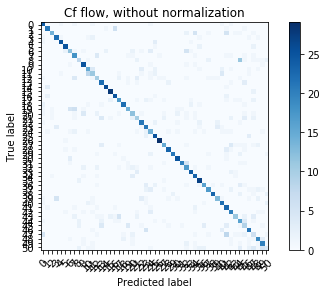

In [34]:
plt.figure()
plot_confusion_matrix(cf_flow, classes=range(0,51),
                      title='Cf flow, without normalization') #classes=class_names,

In [35]:
print(video_pred
    )

[45, 5, 28, 28, 28, 28, 42, 28, 28, 28, 28, 41, 41, 28, 7, 41, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 41, 41, 16, 41, 41, 41, 41, 41, 41, 7, 41, 41, 41, 12, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 1, 41, 24, 34, 34, 13, 13, 45, 31, 22, 19, 19, 41, 19, 41, 19, 41, 45, 45, 45, 13, 36, 36, 36, 49, 45, 45, 28, 45, 13, 8, 44, 8, 45, 45, 25, 10, 11, 40, 22, 11, 10, 48, 22, 11, 10, 10, 10, 42, 11, 40, 10, 10, 10, 10, 10, 10, 35, 46, 10, 25, 22, 10, 10, 10, 41, 41, 16, 16, 16, 1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1, 16, 25, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 45, 43, 43, 21, 21, 43, 17, 12, 47, 43, 17, 17, 43, 43, 7, 7, 16, 43, 43, 43, 17, 17, 47, 13, 45, 47, 43, 15, 15, 43, 33, 33, 21, 21, 42, 21, 33, 33, 33, 33, 33, 43, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 42, 40, 6, 34, 21, 23, 30, 49, 24, 24, 24, 24, 24, 42, 24, 23, 10, 24, 24, 1, 41, 24, 24, 24, 36, 7, 7, 28, 24, 24, 24, 46, 48, 48, 48, 49, 48, 49, 48, 48, 48, 42, 48, 48, 4

In [49]:
print(video_scores_flow[1][0].shape)


(25, 10, 51)


In [55]:
a = [(default_aggregation_func(x[0])) for x in video_scores_flow]

In [57]:
len(a[0])

51

In [58]:
b = [(default_aggregation_func(x[0])) for x in video_scores_rgb]

In [62]:
c = [np.argmax(a[i]*b[i]) for i in range(0,1530)]

In [63]:
print(c)

[21, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 41, 41, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 41, 41, 16, 41, 7, 41, 41, 41, 41, 7, 41, 41, 41, 18, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 34, 34, 34, 13, 13, 27, 32, 22, 1, 47, 45, 19, 47, 19, 47, 45, 45, 45, 13, 45, 45, 45, 13, 27, 27, 11, 45, 45, 8, 8, 8, 45, 45, 10, 10, 10, 10, 11, 11, 11, 10, 22, 46, 10, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 24, 10, 10, 10, 22, 10, 10, 10, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1, 16, 16, 16, 16, 16, 16, 16, 1, 1, 16, 16, 16, 16, 15, 41, 16, 16, 16, 43, 43, 47, 21, 21, 47, 47, 47, 47, 43, 47, 17, 43, 17, 47, 47, 47, 43, 47, 43, 21, 21, 47, 21, 21, 47, 43, 15, 15, 15, 33, 33, 33, 33, 33, 33, 33, 33, 18, 33, 33, 13, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 48, 33, 33, 18, 46, 34, 34, 27, 24, 24, 49, 24, 24, 24, 24, 24, 44, 24, 0, 40, 24, 24, 17, 1, 24, 24, 24, 33, 17, 17, 30, 24, 24, 24, 46, 48, 48, 48, 49, 48, 48, 48, 48, 49, 42, 10, 48

In [64]:
cf_comb = confusion_matrix(video_labels, c).astype(float)

cls_cnt = cf_comb.sum(axis=1)
cls_hit = np.diag(cf_comb)

cls_acc = cls_hit/cls_cnt

print cls_acc

print 'Accuracy {:.02f}%'.format(np.mean(cls_acc)*100)

if args.save_scores is not None:
    np.savez(args.save_scores, scores=c, labels=video_labels)

[ 0.83  0.63  0.77  0.8   0.77  0.93  0.6   0.73  0.37  0.9   0.73  0.6
  0.53  0.7   0.8   0.97  0.83  0.67  0.83  0.47  0.7   0.47  0.93  0.73
  0.53  0.83  1.    0.67  0.9   0.93  1.    0.87  0.57  0.87  0.87  0.97
  0.7   0.53  0.9   0.53  0.7   0.77  0.77  0.23  0.4   0.37  0.8   0.43
  0.63  0.53  0.17]
Accuracy 70.13%


Confusion matrix, without normalization
[[ 25.   0.   0. ...,   0.   0.   0.]
 [  0.  19.   0. ...,   0.   0.   0.]
 [  0.   0.  23. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   0. ...,  19.   4.   0.]
 [  0.   0.   0. ...,   2.  16.   0.]
 [  0.   0.   1. ...,   1.   2.   5.]]


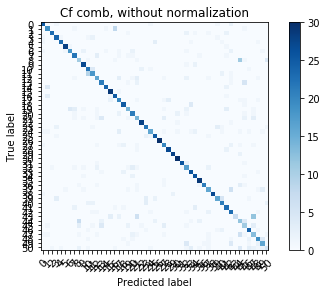

In [65]:
plt.figure()
plot_confusion_matrix(cf_comb, classes=range(0,51),
                      title='Cf comb, without normalization') #classes=class_names,